# Exploratory Data Analysis

## 1. Setting Up EDA Environment

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set visualization styles
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.2)

In [3]:
# silence warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# display all columns and rows if needed
pd.set_option('display.max_columns', None)

## 2. Loading and Initial Data Inspection

In [5]:
# load the training data
train_data = pd.read_csv('../../data/raw/flight_delays_train.csv')

In [6]:
# check the first few rows to understand the structure
print("First 5 rows of the dataset:")
train_data.head()

First 5 rows of the dataset:


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


## 3. Understanding Data Dimensions and Types

In [7]:
# get basic information about the dataset
print(f"Dataset shape: {train_data.shape}")
print("\nColumn data types:")
train_data.dtypes

Dataset shape: (100000, 9)

Column data types:


Month                object
DayofMonth           object
DayOfWeek            object
DepTime               int64
UniqueCarrier        object
Origin               object
Dest                 object
Distance              int64
dep_delayed_15min    object
dtype: object

In [8]:
# check memory usage
print("\nMemory usage:")
train_data.info(memory_usage='deep')


Memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 41.4 MB


In [9]:
# summary statistics for numerical features
print("\nSummary statistics for numerical features:")
train_data.describe().T


Summary statistics for numerical features:


,count,mean,std,min,25%,50%,75%,max
DepTime,100000.0,1341.52388,476.378445,1.0,931.0,1330.0,1733.0,2534.0
Distance,100000.0,729.39716,574.616860,30.0,317.0,575.0,957.0,4962.0


In [10]:
# Summary for categorical features
print("\nSummary statistics for categorical features:")
train_data.describe(include=['O']).T


Summary statistics for categorical features:


,count,unique,top,freq
Month,100000,12,c-8,8830
DayofMonth,100000,31,c-1,3399
DayOfWeek,100000,7,c-4,14736
UniqueCarrier,100000,22,WN,15082
Origin,100000,289,ATL,5834
Dest,100000,289,ATL,5795
dep_delayed_15min,100000,2,N,80956


## 4. Data Quality Checks

In [11]:
# check for missing values
print("Missing values per column:")
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df[missing_df['Missing Values'] > 0]

Missing values per column:


,Missing Values,Percentage


In [12]:
# check for duplicates
duplicates = train_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates} ({duplicates/len(train_data):.2%})")


Number of duplicate rows: 0 (0.00%)


In [13]:
# check the target variable distribution
print("\nTarget variable distribution:")
target_counts = train_data['dep_delayed_15min'].value_counts()
print(target_counts)
print(f"Percentage of delayed flights: {target_counts['Y']/len(train_data):.2%}")


Target variable distribution:
dep_delayed_15min
N    80956
Y    19044
Name: count, dtype: int64
Percentage of delayed flights: 19.04%


## 5. Deeper Data Exploration

### 5.1. Convert Target to Binary and Handle Data Types

In [14]:
# create a copy of the dataframe to avoid warnings
df = train_data.copy()

In [15]:
# convert target variable to binary
df['dep_delayed_15min'] = df['dep_delayed_15min'].map({'Y': 1, 'N': 0})

In [16]:
# remove the 'c-' prefix and convert to integers
df['Month'] = df['Month'].str.replace('c-', '').astype(int)
df['DayofMonth'] = df['DayofMonth'].str.replace('c-', '').astype(int)
df['DayOfWeek'] = df['DayOfWeek'].str.replace('c-', '').astype(int)

In [17]:
# check the updated data types
df.dtypes

Month                 int64
DayofMonth            int64
DayOfWeek             int64
DepTime               int64
UniqueCarrier        object
Origin               object
Dest                 object
Distance              int64
dep_delayed_15min     int64
dtype: object

### 5.2. Temporal Analysis

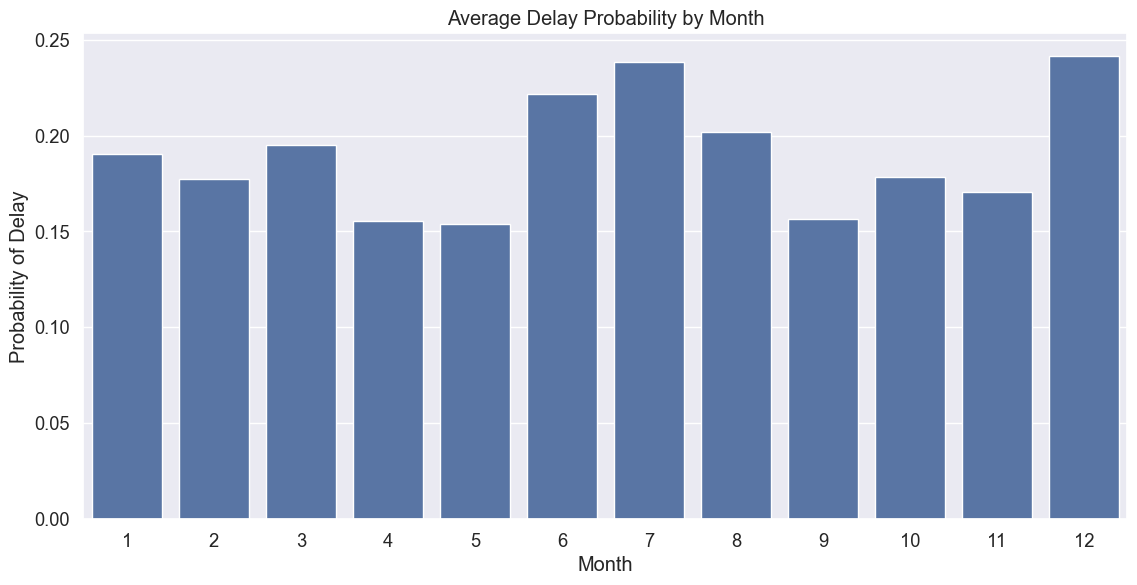

In [18]:
# analyze delays by month
plt.figure(figsize=(12, 6))
monthly_delays = df.groupby('Month')['dep_delayed_15min'].mean()
sns.barplot(x=monthly_delays.index, y=monthly_delays.values)
plt.title('Average Delay Probability by Month')
plt.xlabel('Month')
plt.ylabel('Probability of Delay')
plt.show()

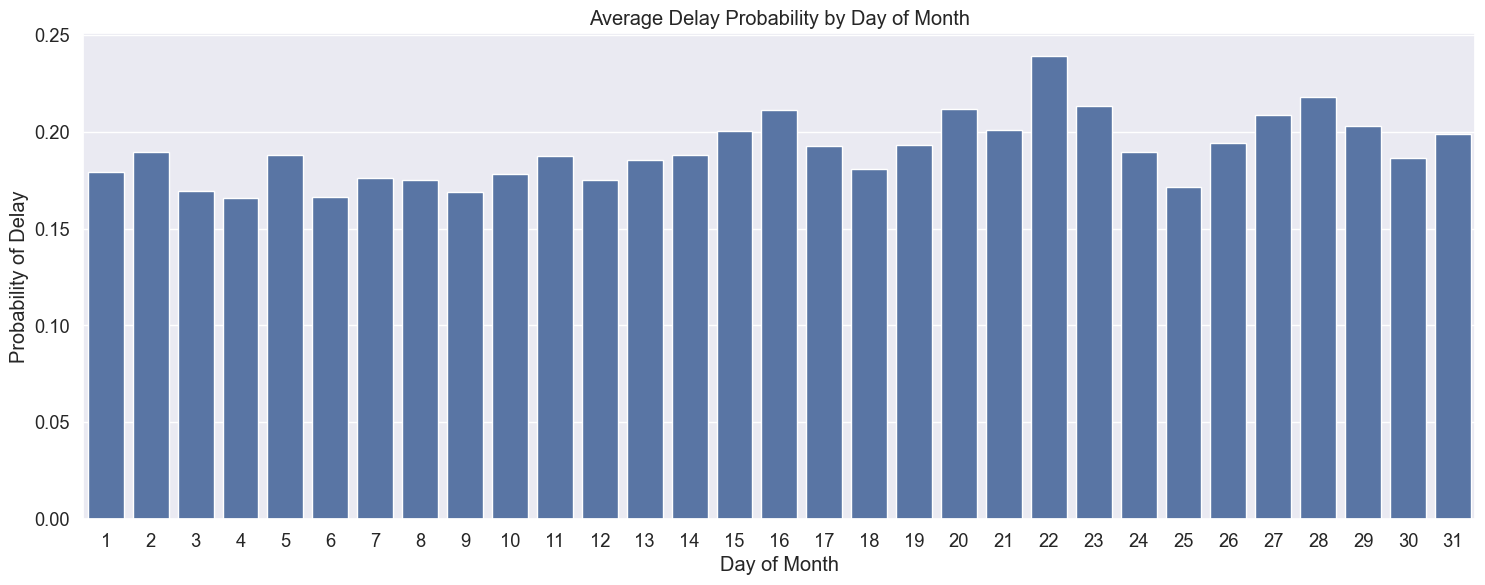

In [19]:
# analyze delays by day of month
plt.figure(figsize=(16, 6))
day_delays = df.groupby('DayofMonth')['dep_delayed_15min'].mean()
sns.barplot(x=day_delays.index, y=day_delays.values)
plt.title('Average Delay Probability by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Probability of Delay')
plt.show()

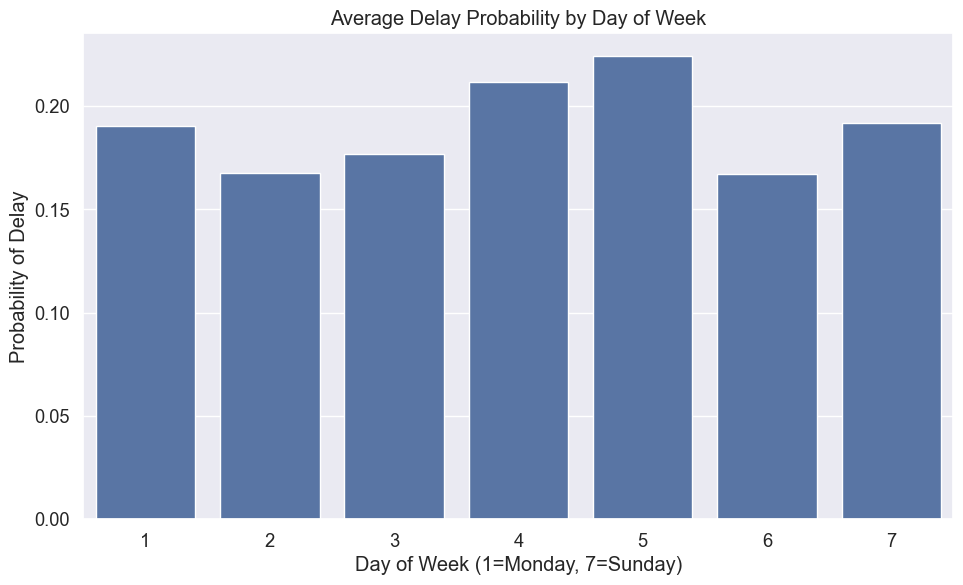

In [20]:
# analyze delays by day of week
plt.figure(figsize=(10, 6))
weekday_delays = df.groupby('DayOfWeek')['dep_delayed_15min'].mean()
sns.barplot(x=weekday_delays.index, y=weekday_delays.values)
plt.title('Average Delay Probability by Day of Week')
plt.xlabel('Day of Week (1=Monday, 7=Sunday)')
plt.ylabel('Probability of Delay')
plt.show()

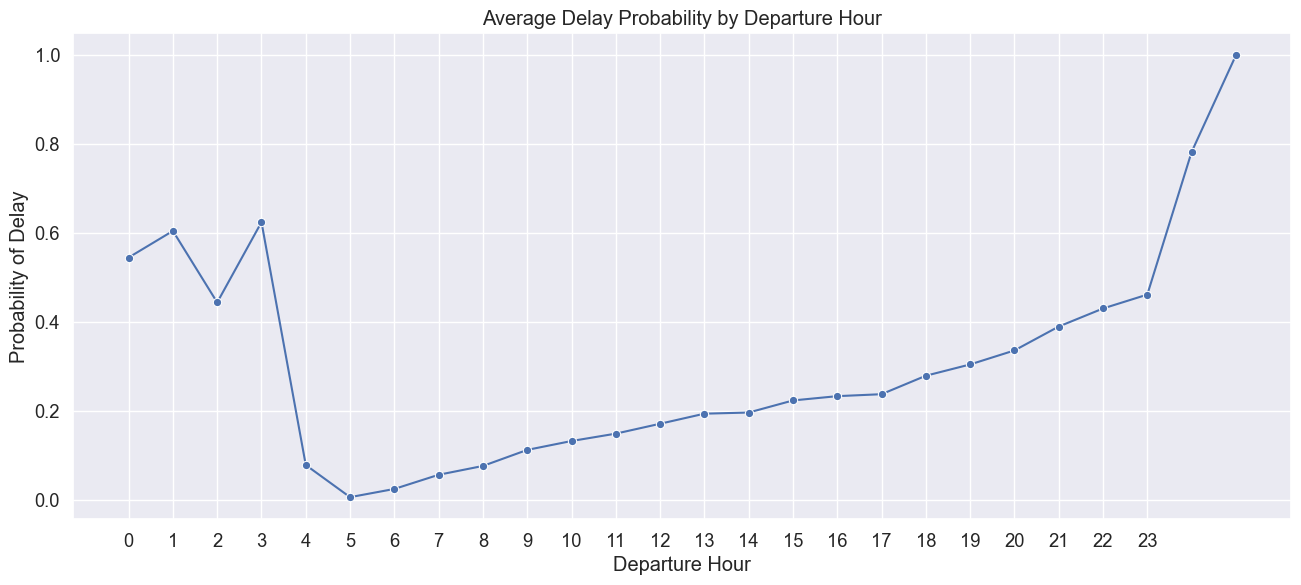

In [21]:
# departure time analysis
# convert to hour of day for better visualization
df['DepHour'] = df['DepTime'] // 100
plt.figure(figsize=(14, 6))
hourly_delays = df.groupby('DepHour')['dep_delayed_15min'].mean()
sns.lineplot(x=hourly_delays.index, y=hourly_delays.values, marker='o')
plt.title('Average Delay Probability by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Probability of Delay')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### 5.3. Carrier Analysis

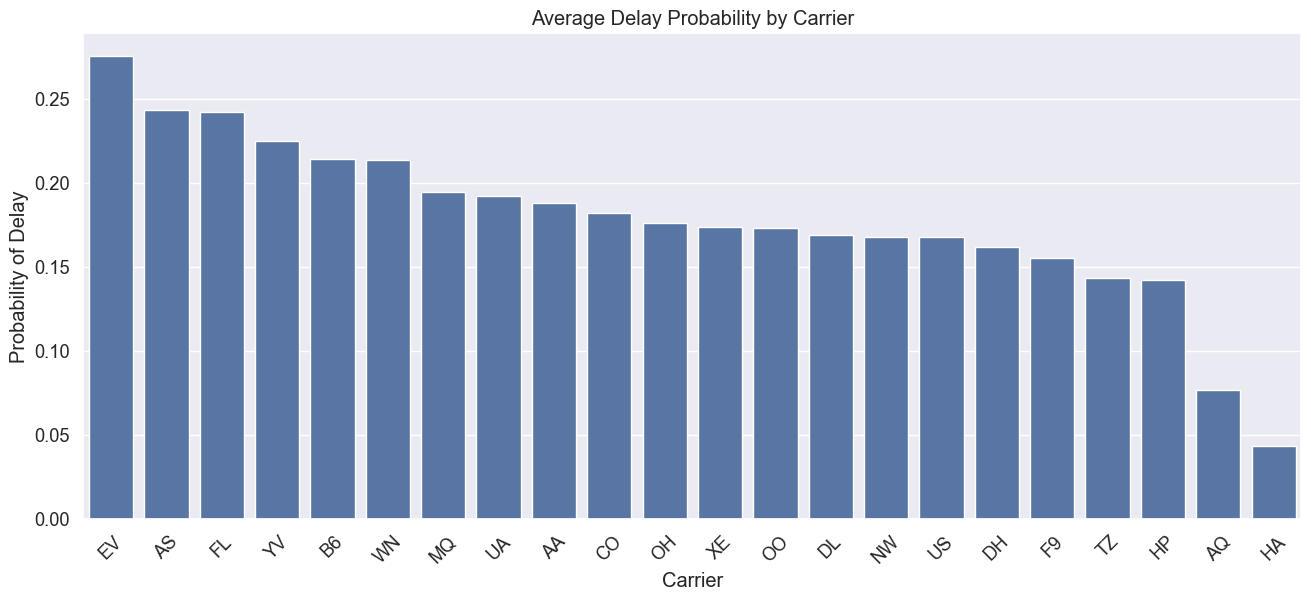

In [22]:
# delays by carrier
plt.figure(figsize=(14, 6))
carrier_delays = df.groupby('UniqueCarrier')['dep_delayed_15min'].mean().sort_values(ascending=False)
sns.barplot(x=carrier_delays.index, y=carrier_delays.values)
plt.title('Average Delay Probability by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Probability of Delay')
plt.xticks(rotation=45)
plt.show()

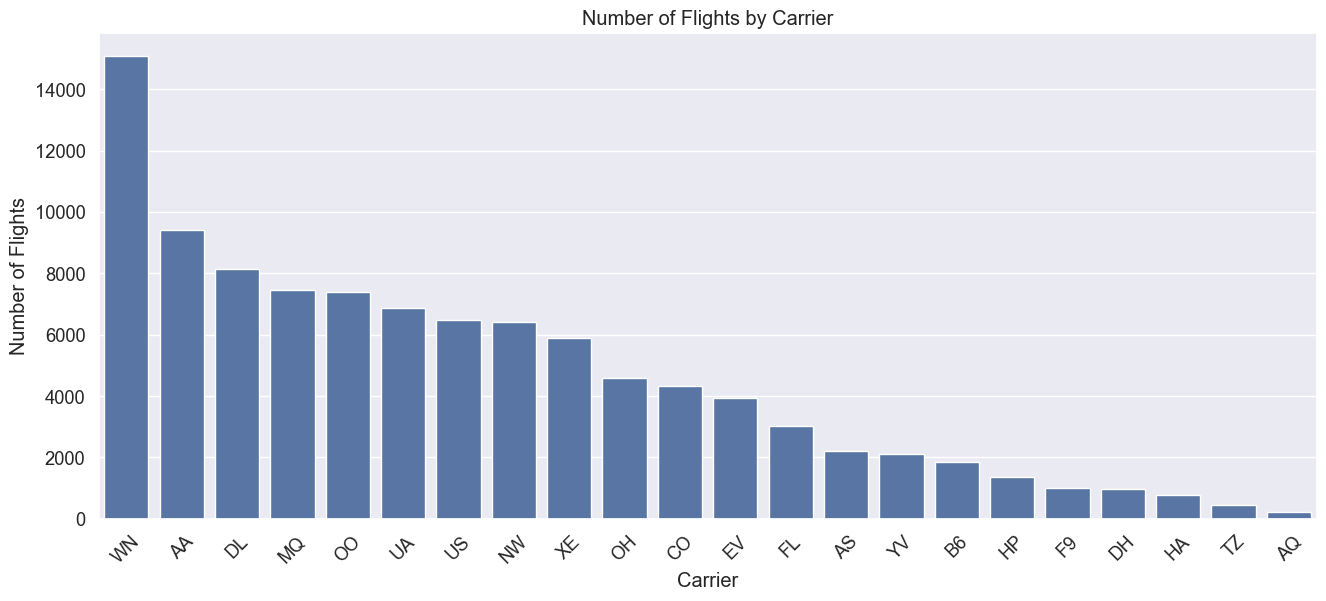

In [23]:
# number of flights by carrier
plt.figure(figsize=(14, 6))
carrier_counts = df['UniqueCarrier'].value_counts()
sns.barplot(x=carrier_counts.index, y=carrier_counts.values)
plt.title('Number of Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

### 5.4. Airport Analysis

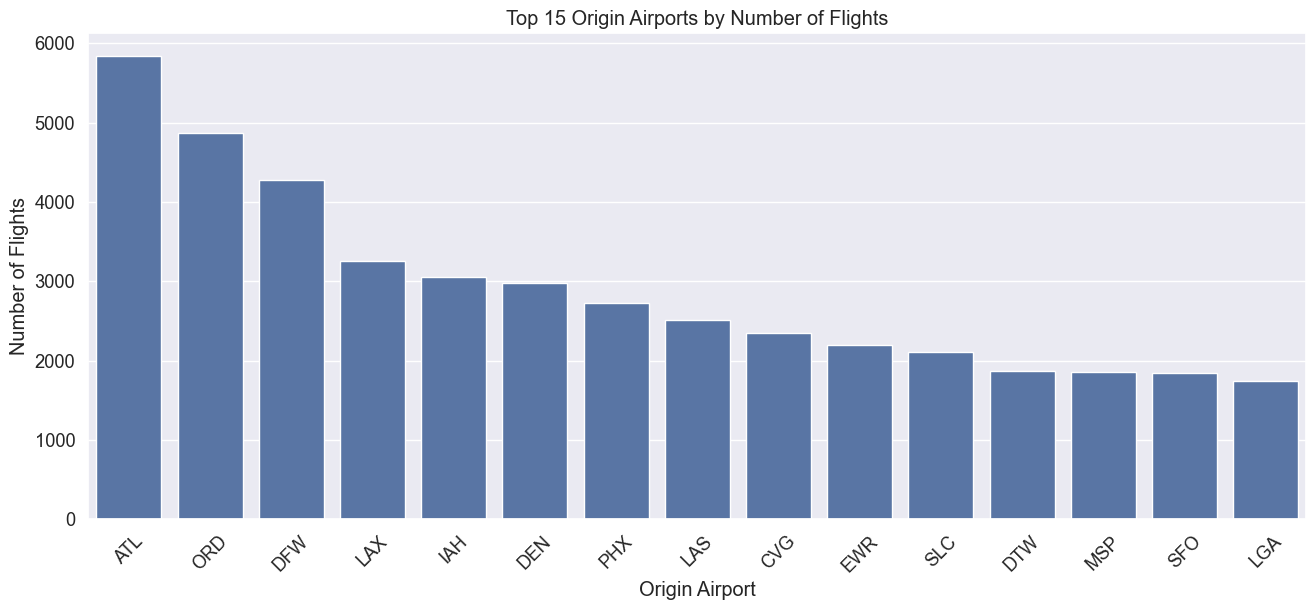

In [24]:
# top 15 origin airports by number of flights
plt.figure(figsize=(14, 6))
origin_counts = df['Origin'].value_counts().head(15)
sns.barplot(x=origin_counts.index, y=origin_counts.values)
plt.title('Top 15 Origin Airports by Number of Flights')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

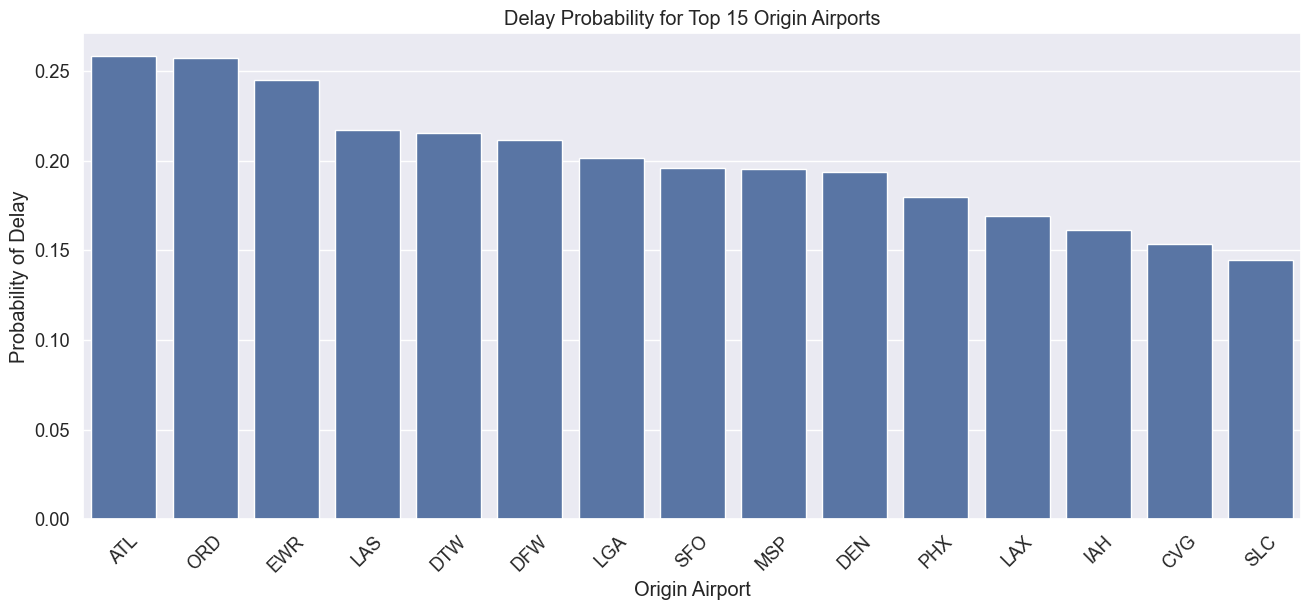

In [25]:
# delay probability by origin airport (top 15)
plt.figure(figsize=(14, 6))
origin_delays = df.groupby('Origin')['dep_delayed_15min'].mean()
top_origins = df['Origin'].value_counts().head(15).index
origin_delays_top = origin_delays[top_origins].sort_values(ascending=False)
sns.barplot(x=origin_delays_top.index, y=origin_delays_top.values)
plt.title('Delay Probability for Top 15 Origin Airports')
plt.xlabel('Origin Airport')
plt.ylabel('Probability of Delay')
plt.xticks(rotation=45)
plt.show()

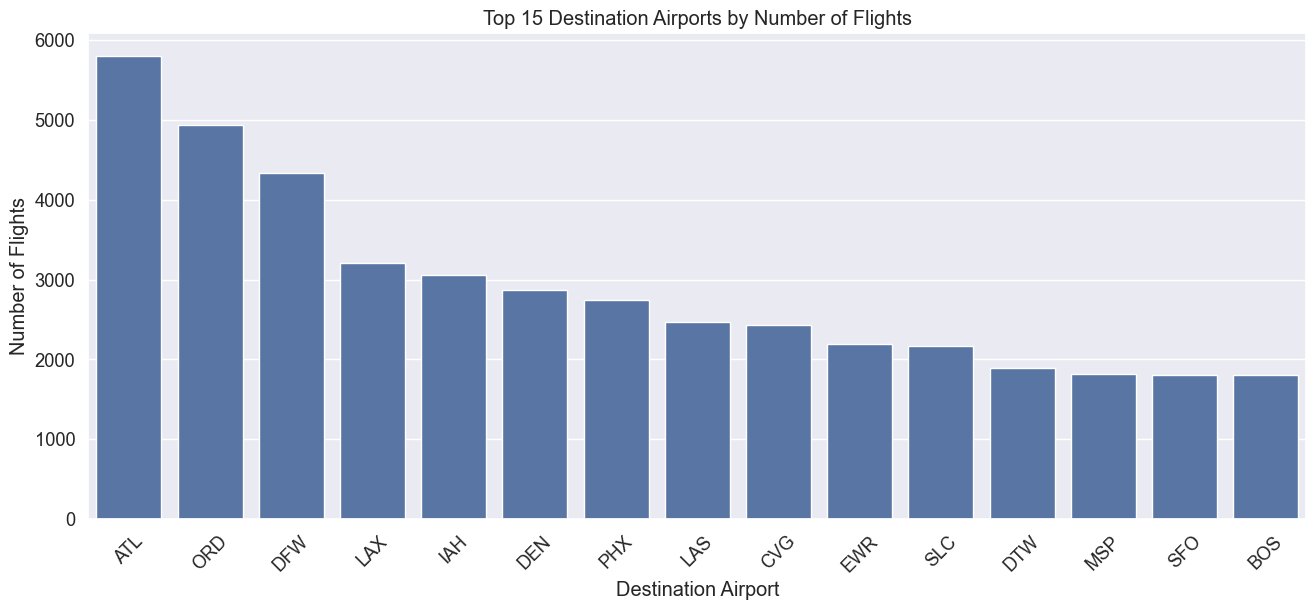

In [26]:
# similar analysis for destination airports
plt.figure(figsize=(14, 6))
dest_counts = df['Dest'].value_counts().head(15)
sns.barplot(x=dest_counts.index, y=dest_counts.values)
plt.title('Top 15 Destination Airports by Number of Flights')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

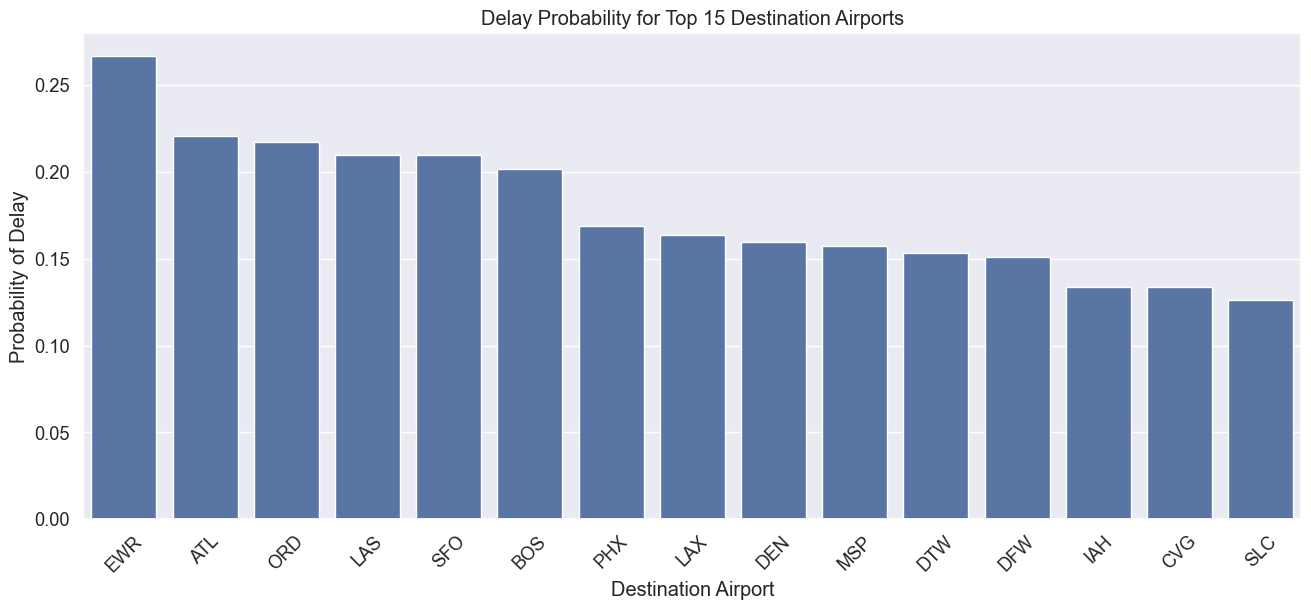

In [27]:
# delay probability by destination airport (top 15)
plt.figure(figsize=(14, 6))
dest_delays = df.groupby('Dest')['dep_delayed_15min'].mean()
top_dests = df['Dest'].value_counts().head(15).index
dest_delays_top = dest_delays[top_dests].sort_values(ascending=False)
sns.barplot(x=dest_delays_top.index, y=dest_delays_top.values)
plt.title('Delay Probability for Top 15 Destination Airports')
plt.xlabel('Destination Airport')
plt.ylabel('Probability of Delay')
plt.xticks(rotation=45)
plt.show()

### 5.5. Distance Analysis

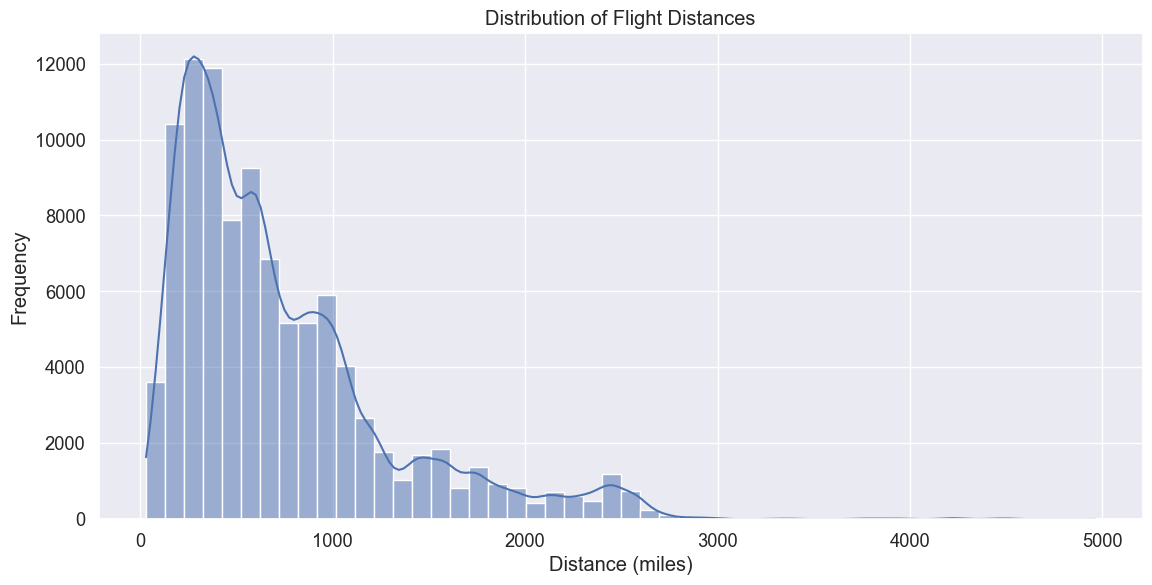

In [28]:
# distribution of flight distances
plt.figure(figsize=(12, 6))
sns.histplot(df['Distance'], bins=50, kde=True)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

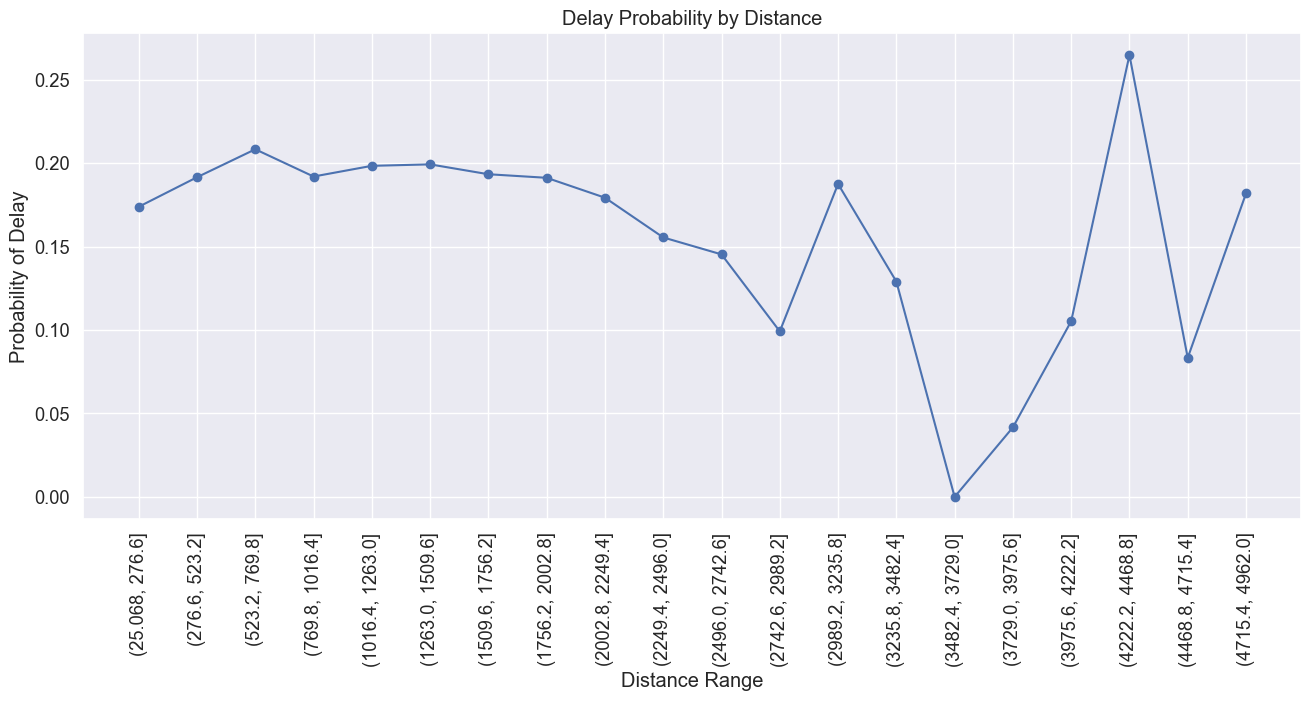

In [29]:
# relationship between distance and delay probability
plt.figure(figsize=(14, 6))
# create distance bins for better visualization
df['Distance_bins'] = pd.cut(df['Distance'], bins=20)
distance_delays = df.groupby('Distance_bins')['dep_delayed_15min'].mean()
plt.plot(distance_delays.index.astype(str), distance_delays.values, marker='o')
plt.title('Delay Probability by Distance')
plt.xlabel('Distance Range')
plt.ylabel('Probability of Delay')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### 5.6. Correlation Analysis

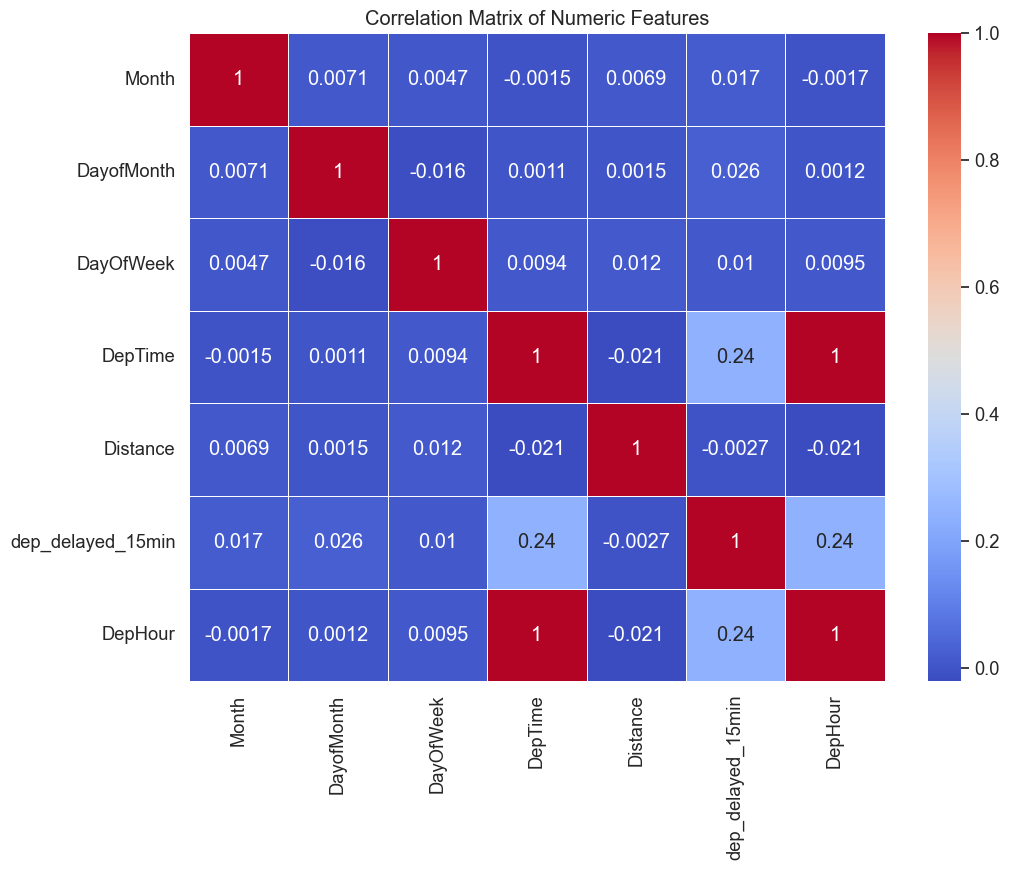

In [30]:
# create a correlation matrix for numeric features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### 5.7. Feature Relationship Analysis

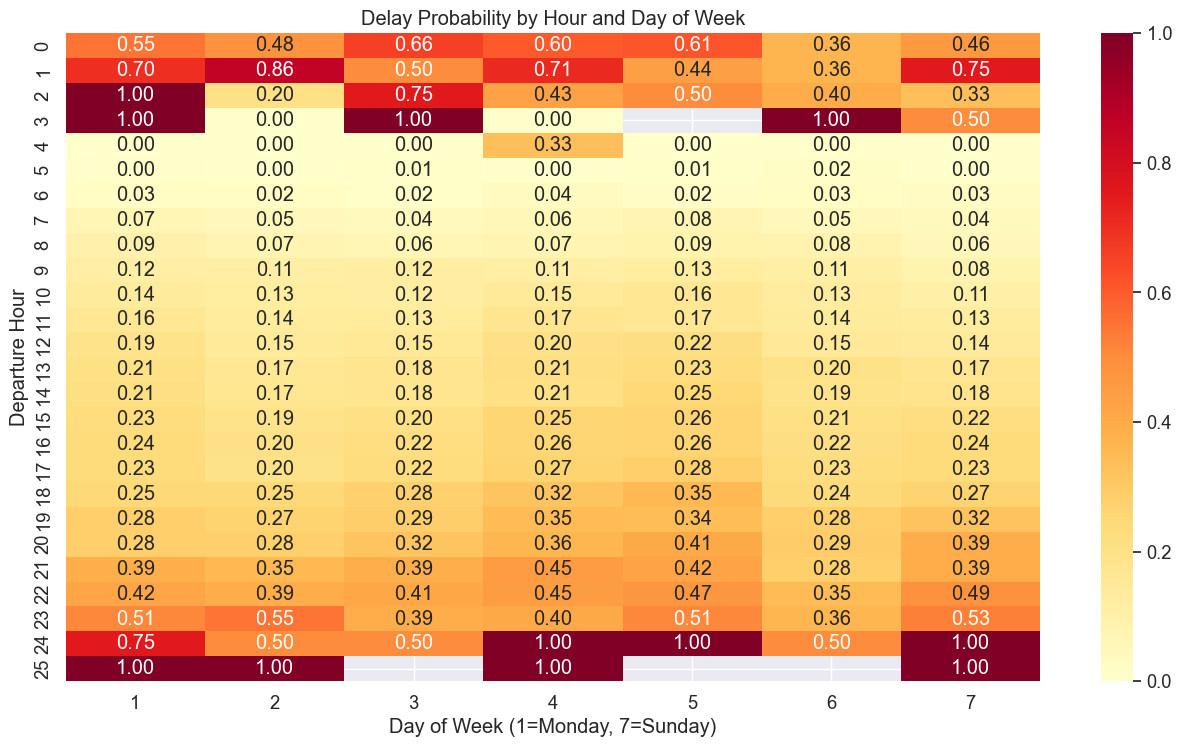

In [31]:
# examine the relationship between departure hour and day of week
plt.figure(figsize=(14, 8))
hour_day_pivot = pd.pivot_table(
    df, 
    values='dep_delayed_15min', 
    index='DepHour', 
    columns='DayOfWeek', 
    aggfunc='mean'
)
sns.heatmap(hour_day_pivot, cmap='YlOrRd', annot=True, fmt=".2f")
plt.title('Delay Probability by Hour and Day of Week')
plt.xlabel('Day of Week (1=Monday, 7=Sunday)')
plt.ylabel('Departure Hour')
plt.show()


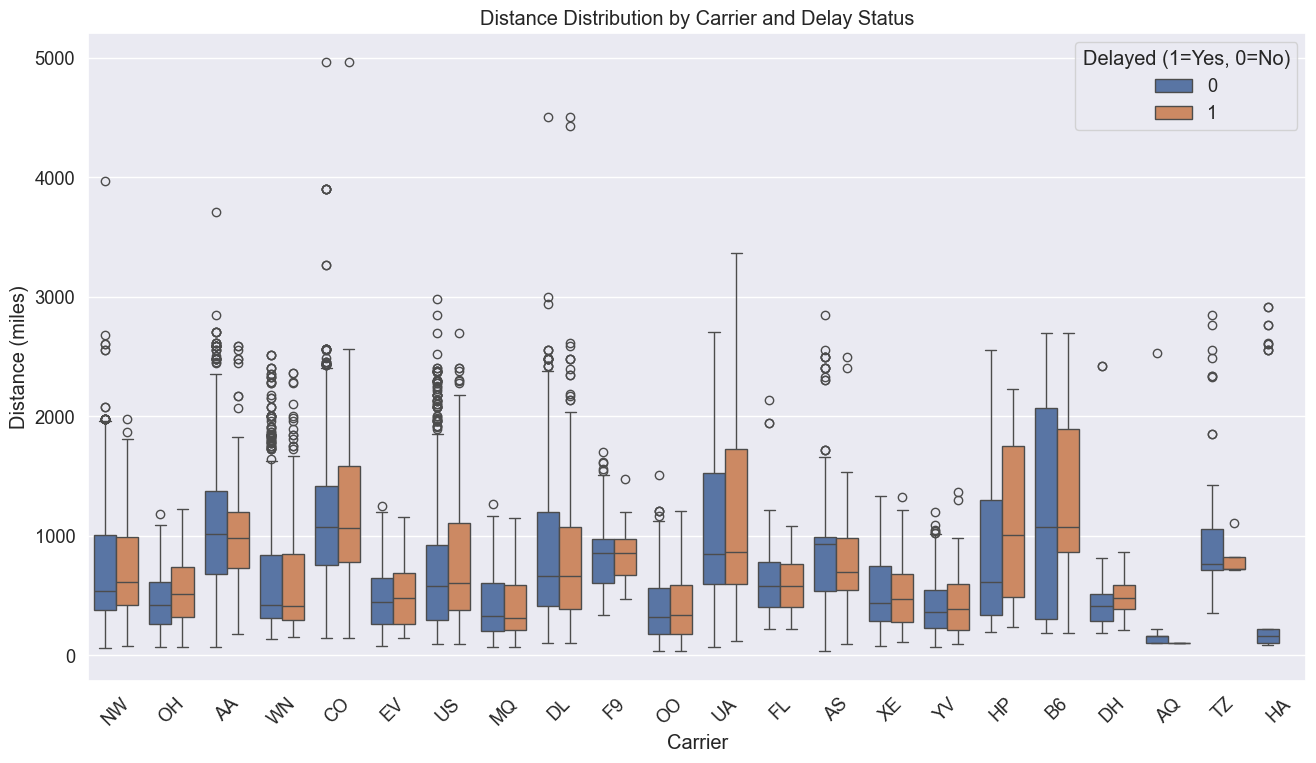

In [32]:
# distance and carrier relationship with delays
plt.figure(figsize=(14, 8))
sns.boxplot(x='UniqueCarrier', y='Distance', hue='dep_delayed_15min', data=df.sample(10000))
plt.title('Distance Distribution by Carrier and Delay Status')
plt.xlabel('Carrier')
plt.ylabel('Distance (miles)')
plt.xticks(rotation=45)
plt.legend(title='Delayed (1=Yes, 0=No)')
plt.show()